In [1]:
!aws rekognition help

REKOGNITION()                                                    REKOGNITION()



NAME
       rekognition -

DESCRIPTION
       This is the Amazon Rekognition API reference.

AVAILABLE COMMANDS
       o compare-faces

       o create-collection

       o create-project

       o create-project-version

       o create-stream-processor

       o delete-collection

       o delete-faces

       o delete-project

       o delete-project-version

       o delete-stream-processor

       o describe-collection

       o describe-project-versions

       o describe-projects

       o describe-stream-processor

       o detect-custom-labels

       o detect-faces

       o detect-labels

       o detect-moderation-labels

       o detect-protective-equipment

       o detect-text

       o get-celebrity-info

       o get-celebrity-recognition

       o get-content-moderation

       o get-face-detection

       o get-face-search

       o get-label-detection

       o get-person-tracking

   

In [2]:
!aws s3 help

S3()                                                                      S3()



NAME
       s3 -

DESCRIPTION
       This  section  explains  prominent concepts and notations in the set of
       high-level S3 commands provided.

   Path Argument Type
       Whenever using a command, at least one path argument must be specified.
       There are two types of path arguments: LocalPath and S3Uri.

       LocalPath: represents the path of a local file or directory.  It can be
       written as an absolute path or relative path.

       S3Uri: represents the location of a S3 object, prefix, or bucket.  This
       must  be  written in the form s3://mybucket/mykey where mybucket is the
       specified S3 bucket, mykey is the specified S3 key.  The path  argument
       must  begin with s3:// in order to denote that the path argument refers
       to a S3 object. Note that prefixes are separated  by  forward  slashes.
       For  example, if the S3 object myobject had the prefix myprefix,

In [3]:
!aws s3 help

S3()                                                                      S3()



NAME
       s3 -

DESCRIPTION
       This  section  explains  prominent concepts and notations in the set of
       high-level S3 commands provided.

   Path Argument Type
       Whenever using a command, at least one path argument must be specified.
       There are two types of path arguments: LocalPath and S3Uri.

       LocalPath: represents the path of a local file or directory.  It can be
       written as an absolute path or relative path.

       S3Uri: represents the location of a S3 object, prefix, or bucket.  This
       must  be  written in the form s3://mybucket/mykey where mybucket is the
       specified S3 bucket, mykey is the specified S3 key.  The path  argument
       must  begin with s3:// in order to denote that the path argument refers
       to a S3 object. Note that prefixes are separated  by  forward  slashes.
       For  example, if the S3 object myobject had the prefix myprefix,

In [4]:
!aws s3 ls s3://350-rekog-project


An error occurred (AccessDenied) when calling the ListObjectsV2 operation: Access Denied


In [5]:
import boto3

In [6]:
client=boto3.client('rekognition')

[beryl1](https://350-rekog-project.s3.amazonaws.com/beryl1.jpeg)

[together1](https://350-rekog-project.s3.amazonaws.com/together1.jpeg)

In [7]:
response=client.compare_faces(SimilarityThreshold=80,
                                  SourceImage={'S3Object':{'Bucket':"350-rekog-project",'Name':"beryl1.jpeg"}},
                                  TargetImage={'S3Object':{'Bucket':"350-rekog-project",'Name':"together1.jpeg"}})

AccessDeniedException: An error occurred (AccessDeniedException) when calling the CompareFaces operation: User: arn:aws:sts::074181110198:assumed-role/AmazonSageMaker-ExecutionRole-20200911T012622/SageMaker is not authorized to perform: rekognition:CompareFaces

In [ ]:
for faceMatch in response['FaceMatches']:
        position = faceMatch['Face']['BoundingBox']
        similarity = str(faceMatch['Similarity'])
        print('The face at ' +
               str(position['Left']) + ' ' +
               str(position['Top']) +
               ' matches with ' + similarity + '% confidence')
for faceNotMatch in response['UnmatchedFaces']:
    position = faceNotMatch['BoundingBox']
    confidence = str(faceNotMatch['Confidence'])
    print('The face at ' +
            str(position['Left']) + ' ' +
            str(position['Top']) +
            ' dose not match with ' + confidence + '% confidence')

In [ ]:
response

## Testing about twins

In [8]:
import numpy as np
import pandas as pd
import s3fs
fs = s3fs.S3FileSystem()

function to extract similarity with beryl

In [9]:
def extract_similarity(photo):
    try:
        similarity = []
        comparison = client.compare_faces(
            SourceImage= {'S3Object':{'Bucket':"350-rekog-project", 'Name':'beryl1.jpeg'}},
            TargetImage = {'S3Object':{'Bucket':"350-rekog-project",'Name':photo}})
        result = {}
        i = 0
        for faceMatch in comparison['FaceMatches']:
            position = faceMatch['Face']['BoundingBox']
            similarity = faceMatch['Similarity']
            result[i] = {}
            result[i]['similarity'] = similarity
            result[i]['position'] = position['Left']
            i+=1
        
    except Exception:
        similarity = np.nan
    return result


In [10]:
together1 = "together1.jpeg"
extract_similarity(together1)

UnboundLocalError: local variable 'result' referenced before assignment

Make a list of the photos

In [11]:
s3_resource = boto3.resource('s3')
my_bucket = s3_resource.Bucket('350-rekog-project')
summaries = my_bucket.objects.all()
image_names = [image.key for image  in summaries]
image_names

ClientError: An error occurred (AccessDenied) when calling the ListObjects operation: Access Denied

In [12]:
together = image_names[-6:]
together

NameError: name 'image_names' is not defined

In [13]:
togetherDF = pd.DataFrame({'Name': together})

NameError: name 'together' is not defined

In [14]:
higherSimilarity = []
lowerSimilarity = []
higherPosition = []
lowerPosition = []
for photo in together:
    result = extract_similarity(photo)
    higherSimilarity.append(result[0]['similarity'])
    lowerSimilarity.append(result[1]['similarity'])
    higherPosition.append(result[0]['position'])
    lowerPosition.append(result[1]['position'])

NameError: name 'together' is not defined

In [15]:
togetherDF['higherSimilarity'] = higherSimilarity
togetherDF['lowerSimilarity'] = lowerSimilarity
togetherDF['higherPosition'] = higherPosition
togetherDF['lowerPosition'] = lowerPosition

NameError: name 'togetherDF' is not defined

In [16]:
togetherDF

NameError: name 'togetherDF' is not defined

Then we will look at the photo and identify the twins by ourself.
0 means beryl is on the left, 1 means beryl is on the right

In [17]:
berylPos = [1,0,0,0,0,1]

In [18]:
correctness = []
for i in range(togetherDF.shape[0]):
    if togetherDF.loc[i]['higherPosition'] < togetherDF.loc[i]['lowerPosition'] and berylPos[i] == 0:
                         correctness.append(0)
    elif togetherDF.loc[i]['higherPosition'] > togetherDF.loc[i]['lowerPosition'] and berylPos[i] == 1:
                           correctness.append(0)
    else:
                           correctness.append(0)


NameError: name 'togetherDF' is not defined

In [19]:
togetherDF['correctness'] = correctness

NameError: name 'togetherDF' is not defined

In [20]:
togetherDF

NameError: name 'togetherDF' is not defined

In [21]:
sum(togetherDF['correctness'])==0

NameError: name 'togetherDF' is not defined

We can see that though AWS rocognize both Amber and Beryl as Beryl, but it successfully assign higher similarity scores for beryl. We will next see the distribution of their similarity scores.

In [22]:
boxplot = togetherDF.boxplot(column = ['higherSimilarity', 'lowerSimilarity'])

NameError: name 'togetherDF' is not defined

From the boxplot, we can see that AWS identifies beryl with similarity scores higher than 99.5 overall and the range is tiny, while the similarity scores between beryl and amber is overall lower and the range is wider. In other words, AWS actually performs very well on identifying twins as it gives overall higher similarity scores for the correct person.

We can also tune the parameter of the function compare_faces by setting the SimilarityThreshold very high (i.e. 99.5), then we may be able to identify only one person in the photo as beryl.

In [23]:
response=client.compare_faces(SimilarityThreshold=99.5,
                                  SourceImage={'S3Object':{'Bucket':"350-rekog-project",'Name':"beryl1.jpeg"}},
                                  TargetImage={'S3Object':{'Bucket':"350-rekog-project",'Name':"together1.jpeg"}})
for faceMatch in response['FaceMatches']:
        position = faceMatch['Face']['BoundingBox']
        similarity = str(faceMatch['Similarity'])
        print('The face at ' +
               str(position['Left']) + ' ' +
               str(position['Top']) +
               ' matches with ' + similarity + '% confidence')
for faceNotMatch in response['UnmatchedFaces']:
    position = faceNotMatch['BoundingBox']
    confidence = str(faceNotMatch['Confidence'])
    print('The face at ' +
            str(position['Left']) + ' ' +
            str(position['Top']) +
            ' dose not match with ' + confidence + '% confidence')

AccessDeniedException: An error occurred (AccessDeniedException) when calling the CompareFaces operation: User: arn:aws:sts::074181110198:assumed-role/AmazonSageMaker-ExecutionRole-20200911T012622/SageMaker is not authorized to perform: rekognition:CompareFaces

However, we will miss 'true beryl' in some other cases because as we can see from the boxplots, the range of the similarity scores overlaps at some points. Thus we cannot find a 'best' similarity threshold that can distinguish amber from beryl without missing true beryl. Except from the ability to distinguish between twins, in the time of a pendamic, we would also like to discover whether masks will impact the recognition. And we would extend the data to people and their photos with glasses, masks and funny faces.

In [24]:
## Warmup and Setup on minor facial variations

In [25]:
!aws s3 ls s3://350project-image


An error occurred (AccessDenied) when calling the ListObjectsV2 operation: Access Denied


In [26]:
import boto3

In [27]:
client = boto3.client('rekognition')

In [28]:
client.detect_labels(Image = {'S3Object':{'Bucket':'350project-image', 'Name':'a1.jpg'}})

AccessDeniedException: An error occurred (AccessDeniedException) when calling the DetectLabels operation: User: arn:aws:sts::074181110198:assumed-role/AmazonSageMaker-ExecutionRole-20200911T012622/SageMaker is not authorized to perform: rekognition:DetectLabels

In [ ]:
## Compare faces when 1) original 2) glass-wearing 3) mask-covering 4) making funny faces

In [ ]:
response = client.compare_faces(SimilarityThreshold=80,
                                  SourceImage={'S3Object':{'Bucket':"350project-image",'Name':"a1.jpg"}},
                                  TargetImage={'S3Object':{'Bucket':"350project-image",'Name':"a2.jpg"}})

In [ ]:
for faceMatch in response['FaceMatches']:
        position = faceMatch['Face']['BoundingBox']
        similarity = str(faceMatch['Similarity'])
        print('The face at ' +
               str(position['Left']) + ' ' +
               str(position['Top']) +
               ' matches with ' + similarity + '% confidence')

In [ ]:
for faceNotMatch in response['UnmatchedFaces']:
    position = faceNotMatch['BoundingBox']
    confidence = str(faceNotMatch['Confidence'])
    print('The face at ' +
            str(position['Left']) + ' ' +
            str(position['Top']) +
            ' dose not match with ' + confidence + '% confidence')

In [29]:
response

NameError: name 'response' is not defined

In [30]:
import numpy as np
import pandas as pd
import s3fs
fs = s3fs.S3FileSystem()

In [31]:
#Case for picture a group

In [32]:
def extract_similarity(photo):
    try:
        similarity = []
        comparison = client.compare_faces(
            SourceImage= {'S3Object':{'Bucket':"350project-image", 'Name':'a1.jpg'}},
            TargetImage = {'S3Object':{'Bucket':"350project-image",'Name':photo}})
        result = {}
        i = 0
        for faceMatch in comparison['FaceMatches']:
            position = faceMatch['Face']['BoundingBox']
            similarity = faceMatch['Similarity']
            result[i] = {}
            result[i]['similarity'] = similarity
            result[i]['position'] = position['Left']
            i+=1
        
    except Exception:
        similarity = np.nan
    return result

In [33]:
cl1 = "a2.jpg"
extract_similarity(cl1)

UnboundLocalError: local variable 'result' referenced before assignment

In [34]:
#Make a list of photoes

In [35]:
def extract_similarity(photo,source_photo):
    try:
        similarity = []
        comparison = client.compare_faces(
            SourceImage= {'S3Object':{'Bucket':"350project-image", 'Name':source_photo}},
            TargetImage = {'S3Object':{'Bucket':"350project-image",'Name':photo}})
        result = {}
        i = 0
        for faceMatch in comparison['FaceMatches']:
            position = faceMatch['Face']['BoundingBox']
            similarity = faceMatch['Similarity']
            result[i] = {}
            result[i]['similarity'] = similarity
            result[i]['position'] = position['Left']
            i+=1
        
    except Exception:
        similarity = np.nan
    return result

In [36]:
extract_similarity('c2.jpg','c1.jpg')

UnboundLocalError: local variable 'result' referenced before assignment

In [37]:
names = ['Claire','Crystal','Gloria','BJT','dl','gql','hj','hzt',
         'lhr','lx','mino','whd','wjk','wyb','wyf','yy','yyqx',
         'zry','angelina','arriana','cate','emma','emmas','jenniferb',
         'jenniferl','jessica','julia','melissa','meryl',
        'ruby','scarlett','wendy']
image_dict = {'Claire':['a1.jpg','a2.jpg','a3.jpg','a4.jpg','a5.jpg'],
 'Crystal':['b1.jpg','b2.jpg','b3.jpg','b4.jpg','b5.jpg'],
 'Gloria':['c1.jpg', 'c2.jpg', 'c3.jpg', 'c4.jpg','c5.jpg'],
 'BJT':['bjt1.JPG','bjt2.JPG','bjt3.JPG','bjt4.JPG','bjt5.jpg'],
 'dl':['dl1.JPG','dl2.JPG','dl3.JPG','dl4.JPG','dl5.jpg'],
 'gql':['gql1.JPG','gql2.JPG','gql3.JPG','gql4.JPG','gql5.jpg'],
 'hj':['hj1.JPG','hj2.JPG','hj3.JPG','hj4.JPG','hk4.JPG'],
 'hzt':['hzt1.JPG','hzt2.JPG','hzt3.JPG','hzt4.JPG','hzt5.jpg'],
 'lhr':['lhr1.JPG','lhr2.JPG','lhr3.JPG','lhr4.JPG','lhr5.JPG'],
 'lx':['lx1.JPG','lx2.JPG','lx3.JPG','lx4.JPG','lx5.JPG'],
 'mino':['mino1.jpg','mino2.JPG','mino3.JPG','mino4.jpg','mino5.jpg'],
 'whd':['whd1.JPG','whd2.JPG','whd3.JPG','whd4.JPG','whd5.JPG'],
 'wjk':['wjk1.JPG','wjk2.JPG','wjk3.JPG','wjk4.JPG','wjk5.JPG'],
 'wyb':['wyb1.JPG','wyb2.JPG','wyb3.JPG','wyb4.JPG','wyb5.JPG'],
 'wyf':['wyf1.JPG','wyf2.JPG','wyf3.jpg','wyf4.JPG','wyf5.JPG'],
 'yy':['yy1.JPG','yy2.JPG','yy3.jpg','yy4.JPG','yy5.JPG'],
 'yyqx':['yyqx1.JPG','yyqx2.JPG','yyqx3.JPG','yyqx4.JPG','yyqx5.JPG'],
 'zry':['zry1.JPG','zry2.JPG','zry3.JPG','zry4.JPG','zry5.JPG'],
 'angelina':['angelina1.jpg','angelina2.jpg','angelina3.jpg','angelina4.jpg','angelina5.jpg'],
 'arriana':['arriana1.jpg','arriana2.jpg','arriana3.jpg','arriana4.jpg','arriana5.jpg'],
 'cate':['cate1.jpg','cate2.jpg','cate3.jpg','cate4.jpg','cate5.jpg'],
 'emma':['emma1.jpg','emma2.jpg','emma3.jpg','emma4.jpg','emma5.jpg'],
 'emmas':['emmas1.jpg','emmas2.jpg','emmas3.jpg','emmas4.jpg','emmas5.jpg'],
 'jenniferb':['jenniferb1.jpg','jenniferb2.jpg','jenniferb3.jpg','jenniferb4.png','jenniferb5.jpg'],
 'jenniferl':['jenniferl1.jpg','jenniferl2.jpg','jenniferl3.jpg','jenniferl4.jpg','jenniferl5.jpg'],
 'jessica':['jessica1.jpg','jessica2.jpg','jessica3.jpg','jessica4.jpg','jessica5.jpg'],
 'julia':['julia1.jpg','julia2.jpg','julia3.jpg','julia4.jpg','julia5.jpg'],
 'melissa':['melissa1.jpg','melissa2.jpg','melissa3.jpg','melissa4.jpg','melissa5.jpg'],
 'meryl':['meryl1.jpg','meryl2.jpg','meryl3.jpg','meryl4.jpg','meryl5.jpg'],
 'ruby':['ruby1.jpg','ruby2.jpg','ruby3.jpg','ruby4.jpg','ruby5.jpg'],
 'scarlett':['scarlett1.jpg','scarlett2.jpg','scarlett3.jpg','scarlett4.jpg','scarlett5.jpg'],
 'wendy':['wendy1.jpg','wendy2.jpg','wendy3.jpg','wendy4.jpg','wendy5.jpg'],
             }

In [38]:
df = pd.DataFrame({'Name': names})
glasses = []
mask = []
funnyFace = []
null = []
for name in names: 
    try:
        source_photo = image_dict[name][0]
    except:
        print(name, "cannot be read")
    try:
        result_glasses = extract_similarity(image_dict[name][1], source_photo)
        similarity_glasses = result_glasses[0]['similarity']
        glasses.append(similarity_glasses)
    except:
        glasses.append(np.nan)
    try:
        result_mask = extract_similarity(image_dict[name][2], source_photo)
        similarity_mask = result_mask[0]['similarity']
        mask.append(similarity_mask)
    except:
        mask.append(np.nan)
    try:
        result_funnyFace = extract_similarity(image_dict[name][3], source_photo)
        similarity_funnyFace = result_funnyFace[0]['similarity']
        funnyFace.append(similarity_funnyFace)
    except:
        funnyFace.append(np.nan)
    try:
        result_null = extract_similarity(image_dict[name][4], source_photo)
        similarity_null = result_null[0]['similarity']
        null.append(similarity_null)
    except:
        null.append(np.nan)

In [39]:
df['glasses'] = glasses
df['mask'] = mask
df['funnyFace'] = funnyFace
df['null'] = null
df

,Name,glasses,mask,funnyFace,null
0,Claire,NaN,NaN,NaN,NaN
1,Crystal,NaN,NaN,NaN,NaN
2,Gloria,NaN,NaN,NaN,NaN
3,BJT,NaN,NaN,NaN,NaN
4,dl,NaN,NaN,NaN,NaN
5,gql,NaN,NaN,NaN,NaN
6,hj,NaN,NaN,NaN,NaN
7,hzt,NaN,NaN,NaN,NaN
8,lhr,NaN,NaN,NaN,NaN
9,lx,NaN,NaN,NaN,NaN


In [41]:
The result shows that differet facial appearances does not significantly change the similarity since all of the photoes have 99%+ similarity.

SyntaxError: invalid syntax (<ipython-input-41-d11223b9ec42>, line 1)

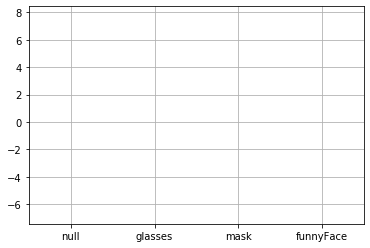

In [42]:
boxplot = df.boxplot(column = ['null','glasses', 'mask', 'funnyFace'])

In [43]:
The boxplot shows that wearing masks affects the overall identification of persons, much more than wearing glasses or giving funny faces. If empirical evidence matches with the result, then minor facial changes in characteristics would not change the result significantly (for example, iPhone should be able to still unlock using facial identification".

SyntaxError: invalid syntax (<ipython-input-43-586a1e264255>, line 1)

In [ ]:
from scipy.stats import f_oneway

In [ ]:
F,p = f_oneway(df['null'][~np.isnan(df['null'])],df['glasses'][~np.isnan(df['glasses'])], df['mask'][~np.isnan(df['mask'])], df['funnyFace'][~np.isnan(df['funnyFace'])])

In [ ]:
F

In [ ]:
P

In [ ]:
from scipy import stats

In [44]:
stats.ttest_ind(df['null'][~np.isnan(df['null'])],df['glasses'][~np.isnan(df['glasses'])], equal_var = False)

NameError: name 'stats' is not defined

In [45]:
stats.ttest_ind(df['null'][~np.isnan(df['null'])],df['mask'][~np.isnan(df['mask'])], equal_var = False)

NameError: name 'stats' is not defined

In [46]:
stats.ttest_ind(df['null'][~np.isnan(df['null'])],df['funnyFace'][~np.isnan(df['funnyFace'])], equal_var = False)

NameError: name 'stats' is not defined

In [ ]:
According to the T test, by comparing the image of people wearing glasses, masks, and making funny faces with their daily pictures respectively. We could find that the p values are 0.09, 0.003 and 0.114. Comparing with p=0.05, since 0.003 is less than 0.05, we reject the null hypothesis that there is no difference in the person with masks on with themself, indicating that AWS Rekognition fails to identify people with masks and the themselves as the same individual.And for the part that AWS Rekognition match the faces with masks successfully, the mean similarity score is different from that of regular photos ('null') by T-test. 